<a href="https://colab.research.google.com/github/BabeRush/NLP_final_project/blob/main/datasets_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets Exploration & Preprocessing

In [1]:
! pip install imbalanced-learn

In [2]:
# Visualization
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
from tabulate import tabulate
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
from wordcloud import WordCloud
from google.colab import drive


In [3]:
!git clone https://github.com/BabeRush/NLP_final_project.git

fatal: destination path 'NLP_final_project' already exists and is not an empty directory.


### ISOT Dataset

In [4]:
# ISOT dataset
df_real = pd.read_csv('/content/NLP_final_project/True.csv',encoding='utf-8')
df_fake = pd.read_csv ('/content/NLP_final_project/Fake.csv',encoding='utf-8')

##### Real DS info

In [5]:
df_real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
df_real.info()
df_real.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


##### Fake DS info

In [7]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
df_fake.info()
df_fake.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


##### ISOT Distributions

*subjects*

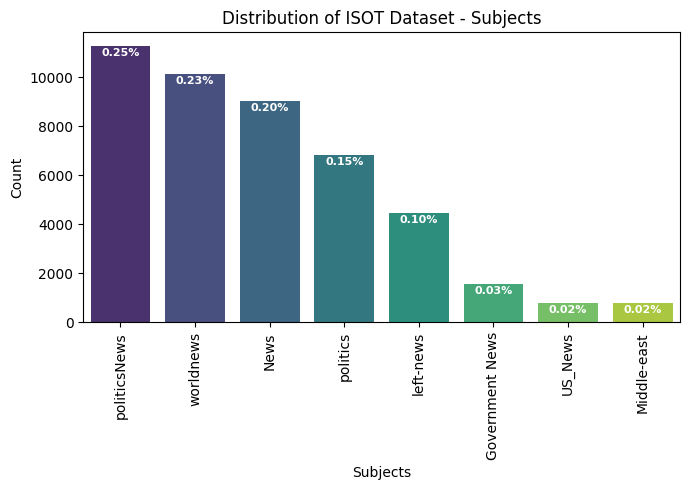

In [9]:
df_real['label'] = 1
df_fake['label'] = 0
comb_ISOT = pd.concat([df_real, df_fake], axis=0, ignore_index=True)
comb_ISOT = comb_ISOT.drop('date', axis=1)

subject_counts = comb_ISOT['subject'].value_counts()
total = len(df_fake) + len(df_real)

plt.figure(figsize=(7, 5))
ax = sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='viridis')


plt.xlabel('Subjects')
plt.ylabel('Count')
plt.title('Distribution of ISOT Dataset - Subjects')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()/total:.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='white', xytext=(0, -5),
                textcoords='offset points',fontweight='bold')


# Show the plot
plt.tight_layout()
plt.show()

*True/False*

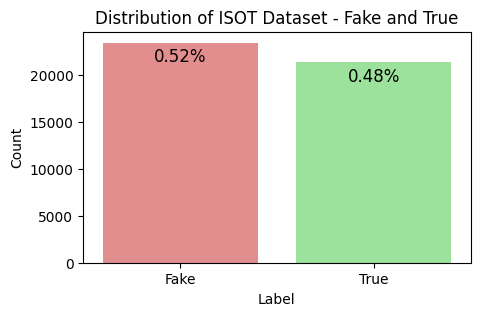

In [10]:
len_fake = len(df_fake)
len_true = len(df_real)

plt.figure(figsize=(5, 3))
categories = ['Fake', 'True']
counts = [len_fake, len_true]
total = len_fake + len_true
data = {'Category': categories, 'Count': counts}

colors = ['lightcoral', 'lightgreen']
ax = sns.barplot(x='Category', y='Count', data=data, palette=colors)

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of ISOT Dataset - Fake and True')

for p in ax.patches:
    ax.annotate(f'{p.get_height()/total:.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, -10),
                textcoords='offset points')
plt.show()

### LIAR Dataset

In [11]:
liar_train = pd.read_csv('/content/NLP_final_project/train.tsv', sep='\t',encoding='utf-8', header=None)
liar_test = pd.read_csv('/content/NLP_final_project/test.tsv', sep='\t',encoding='utf-8', header=None)
liar_valid = pd.read_csv('/content/NLP_final_project/valid.tsv', sep='\t',encoding='utf-8', header=None)

# Adding column names
liar_train.columns = ['id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context']
liar_test.columns = ['id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context']
liar_valid.columns = ['id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context']

In [12]:
comb_LIAR = pd.concat([liar_train, liar_valid, liar_test], axis=0, ignore_index=True)
temp_len_LIAR = len(comb_LIAR)

##### LIAR info

In [13]:
comb_LIAR.head()

,id,label,statement,subject,speaker,job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [14]:
comb_LIAR.info()
comb_LIAR.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12791 entries, 0 to 12790
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    12791 non-null  object 
 1   label                 12791 non-null  object 
 2   statement             12791 non-null  object 
 3   subject               12789 non-null  object 
 4   speaker               12789 non-null  object 
 5   job_title             9224 non-null   object 
 6   state_info            10042 non-null  object 
 7   party_affiliation     12789 non-null  object 
 8   barely_true_counts    12789 non-null  float64
 9   false_counts          12789 non-null  float64
 10  half_true_counts      12789 non-null  float64
 11  mostly_true_counts    12789 non-null  float64
 12  pants_on_fire_counts  12789 non-null  float64
 13  context               12660 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.4+ MB


,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts
count,12789.000000,12789.000000,12789.000000,12789.000000,12789.000000
mean,11.583939,13.359059,17.185785,16.497850,6.251388
std,18.978037,24.140086,35.847678,36.165276,16.180777
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,3.000000,3.000000,1.000000
75%,12.000000,15.000000,13.000000,12.000000,5.000000
max,70.000000,114.000000,160.000000,163.000000,105.000000


In [15]:
columns_to_keep = ['label', 'statement', 'subject', 'speaker']
comb_LIAR = comb_LIAR[columns_to_keep]
comb_LIAR = comb_LIAR.dropna()

In [16]:
reduced = temp_len_LIAR - len(comb_LIAR)
print(f'Number of LIAR instances that removed: {reduced}({(reduced/temp_len_LIAR)*100:.5f}%) instances')

Number of LIAR instances that removed: 2(0.01564%) instances


In [17]:
comb_LIAR.info()
comb_LIAR.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12789 entries, 0 to 12790
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      12789 non-null  object
 1   statement  12789 non-null  object
 2   subject    12789 non-null  object
 3   speaker    12789 non-null  object
dtypes: object(4)
memory usage: 499.6+ KB


,label,statement,subject,speaker
count,12789,12789,12789,12789
unique,6,12763,4534,3309
top,half-true,On a cap-and-trade plan.,health-care,barack-obama
freq,2627,3,474,611


In [18]:
comb_LIAR.head()

,label,statement,subject,speaker
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist


##### LIAR Distributions

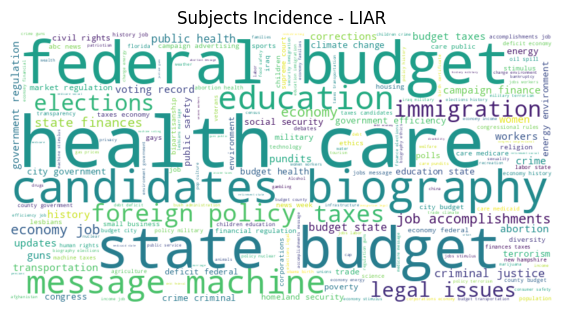

In [19]:
# There are many subjects (more than 100), thus we will show a plot that will "give a feeling"
all_subjects = ' '.join(comb_LIAR['subject'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_subjects)

plt.figure(figsize=(7, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Subjects Incidence - LIAR')
plt.show()

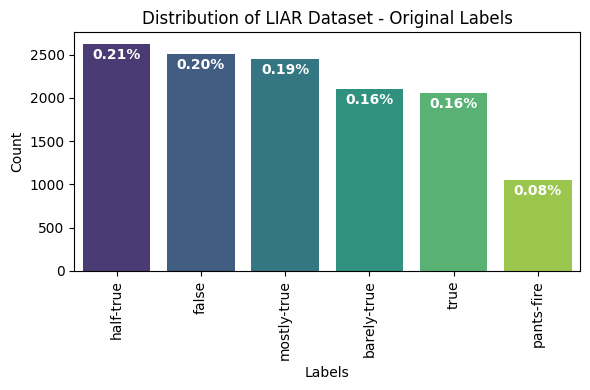

In [20]:
subject_counts = comb_LIAR['label'].value_counts()
total = len(comb_LIAR)

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='viridis')


plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of LIAR Dataset - Original Labels')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()/total:.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='white', xytext=(0, -8),
                textcoords='offset points',fontweight='bold')


# Show the plot
plt.tight_layout()
plt.show()

In [21]:
# Mapping the labels to True(1) and False(0) according to LIAR documentation
label_mapping = {
    'true': 1,
    'mostly-true': 1,
    'half-true': 0,
    'barely-true': 0,
    'false': 0,
    'pants-fire': 0
}

# Update the 'Label' column based on the mapping
comb_LIAR['label'] = comb_LIAR['label'] .map(label_mapping)

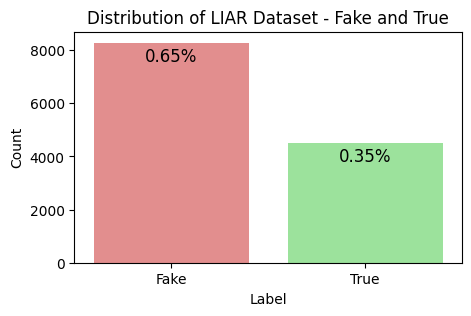

In [22]:
len_fake = len(comb_LIAR[comb_LIAR['label'] == 0])
len_true = len(comb_LIAR[comb_LIAR['label'] == 1])

plt.figure(figsize=(5, 3))
categories = ['Fake', 'True']
counts = [len_fake, len_true]
total = len_fake + len_true
data = {'Category': categories, 'Count': counts}

colors = ['lightcoral', 'lightgreen']
ax = sns.barplot(x='Category', y='Count', data=data, palette=colors)

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of LIAR Dataset - Fake and True')

for p in ax.patches:
    ax.annotate(f'{p.get_height()/total:.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, -10),
                textcoords='offset points')
plt.show()

IMBALANCED DATA!

 Separating the test set before up-sampling is crucial. Up-sampling creates duplicates of data points, and if we split the data after up-sampling, the test set won't be entirely new.

### Saving Datasets Option

In [23]:
while True:
    inp = input("Do you want to mount your drive to this Colab? (y/n) -> ").lower()
    if inp.lower() == 'y':
        drive.mount('/content/drive')
        print("Drive mounted!")
        break
    elif inp == 'n':
        print("The SEPARATED datasets won't be saved on your drive!")
        break
    else:
        print("Invalid input. Please enter 'y' or 'n'.")

Do you want to mount your drive to this Colab? (y/n) -> y
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive mounted!


In [24]:
import os

inp2 = input("If you want the DSs will be saved in your DRIVE, press 'y'\nEverything else will be considered as no  ->")

if inp2.lower() == 'y':
    drive_folder = '/content/drive/MyDrive/FN-classification/'

    # Create the folder if it doesn't exist
    if not os.path.exists(drive_folder):
        os.makedirs(drive_folder)
        print("Folder 'FN-classification' created!")

    LIAR_path = os.path.join(drive_folder, 'comb_LIAR.pkl')
    ISOT_path = os.path.join(drive_folder, 'comb_ISOT.pkl')

    # Save DataFrames as pickles
    comb_LIAR.to_pickle(LIAR_path)
    comb_ISOT.to_pickle(ISOT_path)

    print("DataFrames saved!")
else:
    print("No action taken.")

If you want the DSs will be saved in your DRIVE, press 'y'
Everything else will be considered as no  ->y
DataFrames saved!


In [25]:
# # Sanity check of loading
# LIAR_loaded = pd.read_pickle('/content/drive/MyDrive/FN-classification/comb_LIAR.pkl')
# ISOT_loaded = pd.read_pickle('/content/drive/MyDrive/FN-classification/comb_ISOT.pkl')
# LIAR_loaded.shape
# ISOT_loaded.shape

#### Adjusting the datasets for best matching

In [26]:
comb_ISOT.head()

,title,text,subject,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1


In [27]:
comb_LIAR.head()

,label,statement,subject,speaker
0,0,Says the Annies List political group supports ...,abortion,dwayne-bohac
1,0,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell
2,1,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama
3,0,Health care reform legislation is likely to ma...,health-care,blog-posting
4,0,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist


In [28]:
comb_LIAR = comb_LIAR.drop('speaker', axis=1)
comb_LIAR.rename(columns={'statement': 'title and text'}, inplace=True)
label_column = comb_LIAR.pop('label')
comb_LIAR['label'] = label_column

In [29]:
comb_ISOT['title and text'] = comb_ISOT['title'] + ' ' + comb_ISOT['text']
comb_ISOT.drop(['title', 'text'], axis=1, inplace=True)
title_text_column = comb_ISOT.pop('title and text')
comb_ISOT.insert(0, 'title and text', title_text_column)

In [30]:
comb_LIAR.head()

,title and text,subject,label
0,Says the Annies List political group supports ...,abortion,0
1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",0
2,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,1
3,Health care reform legislation is likely to ma...,health-care,0
4,The economic turnaround started at the end of ...,"economy,jobs",0


In [31]:
comb_ISOT.head()

,title and text,subject,label
0,"As U.S. budget fight looms, Republicans flip t...",politicsNews,1
1,U.S. military to accept transgender recruits o...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,politicsNews,1


##### Separating to Train and Test DSs separately, before up-sampling, etc.

In [32]:
from sklearn.model_selection import train_test_split

X_LIAR = comb_LIAR.drop('label', axis=1)
y_LIAR = comb_LIAR['label']

X_ISOT = comb_ISOT.drop('label', axis=1)
y_ISOT = comb_ISOT['label']

# by default, the train_test_split function shuffles the data before splitting
X_LIAR_train, X_LIAR_test, y_LIAR_train, y_LIAR_test = train_test_split(X_LIAR, y_LIAR, test_size=0.2, random_state=42)

X_ISOT_train, X_ISOT_test, y_ISOT_train, y_ISOT_test = train_test_split(X_ISOT, y_ISOT, test_size=0.2, random_state=42)

##### Train and Test Distributions

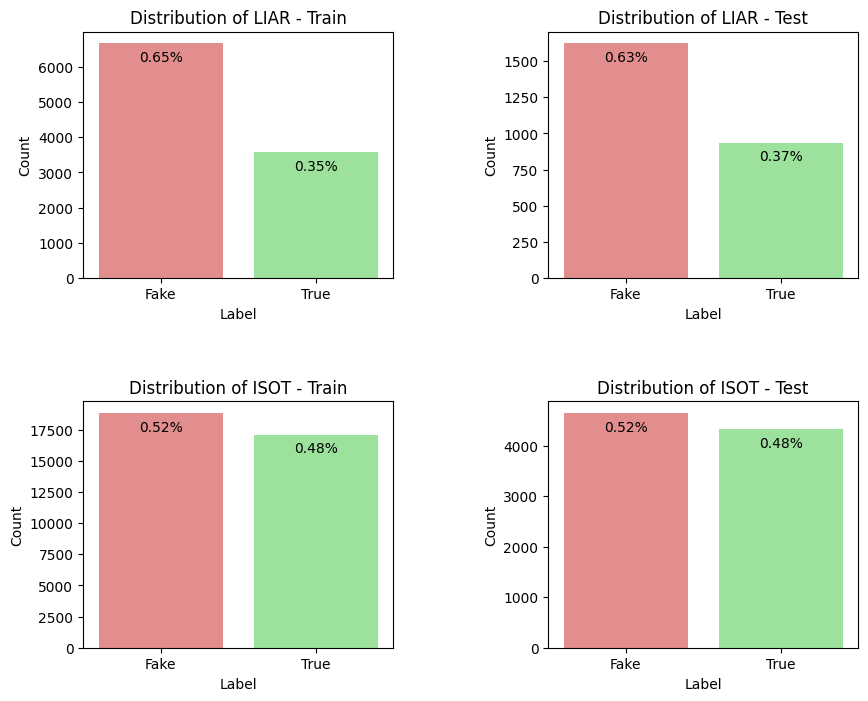

In [33]:
def plot_labels(df, ds_name, test=0, ax=None):
    value_counts = df.value_counts()
    data = {'Category': ['Fake', 'True'], 'Count': value_counts}
    df_counts = pd.DataFrame(data)
    total = value_counts.sum()

    if ax is None:
        plt.figure(figsize=(4, 3))  # Adjust individual plot size
    colors = ['lightcoral', 'lightgreen']
    ax = sns.barplot(x='Category', y='Count', data=df_counts, palette=colors, ax=ax)

    for p in ax.patches:
        ax.annotate(f'{p.get_height()/total:.2f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, -10),
                    textcoords='offset points')

    param = 'Train'
    if test == 0:
      param = "ALL DATA"
    elif test == 1:
      param = 'Train'
    else:
      param = 'Test'
    ax.set_xlabel('Label')
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of {ds_name} - {param}')

fig, axs = plt.subplots(2, 2, figsize=(10, 8), gridspec_kw={'hspace': 0.5, 'wspace': 0.5})

plot_labels(y_LIAR_train, 'LIAR', test=1, ax=axs[0, 0])
plot_labels(y_LIAR_test, 'LIAR', test=2, ax=axs[0, 1])

plot_labels(y_ISOT_train, 'ISOT', test=1, ax=axs[1, 0])
plot_labels(y_ISOT_test, 'ISOT', test=2, ax=axs[1, 1])

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    plt.tight_layout()
plt.show()

##### Subjects Distribution (combined)

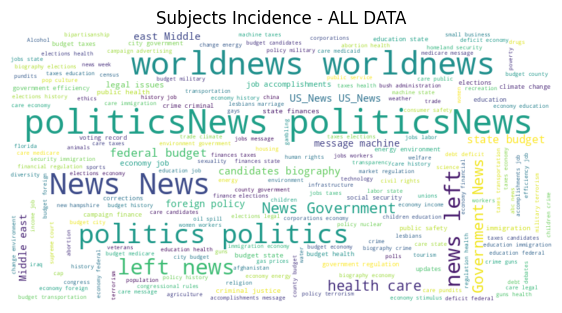

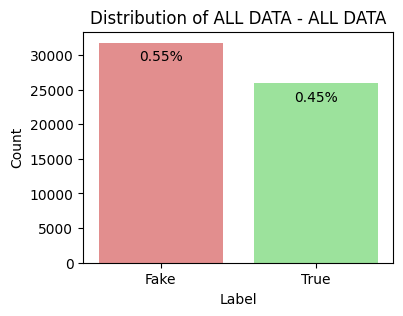

In [34]:
temp_comb = pd.concat([comb_LIAR, comb_ISOT], axis=0, ignore_index=True)
all_subjects = ' '.join(temp_comb['subject'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_subjects)

plt.figure(figsize=(7, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Subjects Incidence - ALL DATA')
plt.show()

plot_labels(temp_comb['label'], 'ALL DATA', ax=None)

Clearly, the ISOT affects a lot on the combined distribution of subjects and Fake vs. True, and there is less necessity to up-sampling the data

#### Preprocess text

In [35]:
import re
import string
import unicodedata
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize



def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Tokenize text and process each token
    words = word_tokenize(text.lower())
    processed_words = []

    for word in words:
        # Skip single-letter and very short words
        if len(word) <= 2:
            continue
        # Remove URLs
        word = re.sub(r'http\S+', '', word)
        # Remove non-ASCII characters
        word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        # Remove punctuation
        word = re.sub(f"[{string.punctuation}]", '', word)
        # Remove numbers
        word = re.sub(r'\d+', '', word)
        # Lemmatization
        word = lemmatizer.lemmatize(word)
        # Skip stop words
        if word not in stop_words:
            processed_words.append(word)

    processed_text = ' '.join(processed_words)
    return processed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [36]:
X_LIAR_train['title and text'] = X_LIAR_train['title and text'].apply(preprocess_text)
X_LIAR_train['subject'] = X_LIAR_train['subject'].apply(preprocess_text)
X_LIAR_test['title and text'] = X_LIAR_test['title and text'].apply(preprocess_text)
X_LIAR_test['subject'] = X_LIAR_test['subject'].apply(preprocess_text)
X_ISOT_train['title and text'] = X_ISOT_train['title and text'].apply(preprocess_text)
X_ISOT_train['subject'] = X_ISOT_train['subject'].apply(preprocess_text)
X_ISOT_test['title and text'] = X_ISOT_test['title and text'].apply(preprocess_text)
X_ISOT_test['subject'] = X_ISOT_test['subject'].apply(preprocess_text)

In [37]:
inp3 = input("Do you want to save you DSs? \'y\' if yes, otherwise will not save  ->")

if inp3.lower() == 'y':
    drive_folder = '/content/drive/MyDrive/FN-classification/'

    # Create the folder if it doesn't exist
    if not os.path.exists(drive_folder):
        os.makedirs(drive_folder)
        print("Folder 'FN-classification' created!")

    X_LIAR_tr_p = os.path.join(drive_folder, 'X_LIAR_train.pkl')
    y_LIAR_tr_p = os.path.join(drive_folder, 'y_LIAR_train.pkl')
    X_LIAR_te_p = os.path.join(drive_folder, 'X_LIAR_test.pkl')
    y_LIAR_te_p = os.path.join(drive_folder, 'y_LIAR_test.pkl')
    X_ISOT_tr_p = os.path.join(drive_folder, 'X_ISOT_train.pkl')
    y_ISOT_tr_p = os.path.join(drive_folder, 'y_ISOT_train.pkl')
    X_ISOT_te_p = os.path.join(drive_folder, 'X_ISOT_test.pkl')
    y_ISOT_te_p = os.path.join(drive_folder, 'y_ISOT_test.pkl')

    # Save DataFrames as pickles
    X_LIAR_train.to_pickle(X_LIAR_tr_p)
    y_LIAR_train.to_pickle(y_LIAR_tr_p)
    X_LIAR_test.to_pickle(X_LIAR_te_p)
    y_LIAR_test.to_pickle(y_LIAR_te_p)
    X_ISOT_train.to_pickle(X_ISOT_tr_p)
    y_ISOT_train.to_pickle(y_ISOT_tr_p)
    X_ISOT_test.to_pickle(X_ISOT_te_p)
    y_ISOT_test.to_pickle(y_ISOT_te_p)

    print("DataFrames saved!")
else:
    print("No action taken.")

Do you want to save you DSs? 'y' if yes, otherwise will not save  ->y
DataFrames saved!


#### Create tagged DSs

In [38]:
# Define a function to add tags to the text
def add_tags(text, column_name):
    tag = '[t]' if column_name == 'title and text' else '[s]'
    return f'{tag} {text}'
tag_X_LIAR_train = X_LIAR_train.copy()
tag_X_LIAR_test = X_LIAR_test.copy()
tag_X_ISOT_train = X_ISOT_train.copy()
tag_X_ISOT_test = X_ISOT_test.copy()

tag_X_LIAR_train['title and text'] = tag_X_LIAR_train['title and text'].apply(add_tags, column_name='title and text')
tag_X_LIAR_train['subject'] = tag_X_LIAR_train['subject'].apply(add_tags, column_name='subject')
tag_X_LIAR_test['title and text'] = tag_X_LIAR_test['title and text'].apply(add_tags, column_name='title and text')
tag_X_LIAR_test['subject'] = tag_X_LIAR_test['subject'].apply(add_tags, column_name='subject')

tag_X_ISOT_train['title and text'] = tag_X_ISOT_train['title and text'].apply(add_tags, column_name='title and text')
tag_X_ISOT_train['subject'] = tag_X_ISOT_train['subject'].apply(add_tags, column_name='subject')
tag_X_ISOT_test['title and text'] = tag_X_ISOT_test['title and text'].apply(add_tags, column_name='title and text')
tag_X_ISOT_test['subject'] = tag_X_ISOT_test['subject'].apply(add_tags, column_name='subject')


In [39]:
X_ISOT_test.isna().sum()

title and text    0
subject           0
dtype: int64

In [40]:
tag_X_ISOT_train.head()

,title and text,subject
36335,[t] hillary lie remember hillary disclosed wa ...,[s] politics
12384,[t] leader likely give goahead new phase brexi...,[s] worldnews
24419,[t] mark hamill back mocking trump reading ant...,[s] news
24740,[t] trump get hilariously owned whining losing...,[s] news
27039,[t] obama labor secretary zap trump foreign po...,[s] news


In [41]:
inp3 = input("Do you want to save you DSs? \'y\' if yes, otherwise will not save  ->")

if inp3.lower() == 'y':
    drive_folder = '/content/drive/MyDrive/FN-classification/'

    # Create the folder if it doesn't exist
    if not os.path.exists(drive_folder):
        os.makedirs(drive_folder)
        print("Folder 'FN-classification' created!")

    tag_X_LIAR_tr_p = os.path.join(drive_folder, 'tag_X_LIAR_train.pkl')
    tag_X_LIAR_te_p = os.path.join(drive_folder, 'tag_X_LIAR_test.pkl')
    tag_X_ISOT_tr_p = os.path.join(drive_folder, 'tag_X_ISOT_train.pkl')
    tag_X_ISOT_te_p = os.path.join(drive_folder, 'tag_X_ISOT_test.pkl')

    # Save DataFrames as pickles
    tag_X_LIAR_train.to_pickle(tag_X_LIAR_tr_p)
    tag_X_LIAR_test.to_pickle(tag_X_LIAR_te_p)
    tag_X_ISOT_train.to_pickle(tag_X_ISOT_tr_p)
    tag_X_ISOT_test.to_pickle(tag_X_ISOT_te_p)

    print("DataFrames saved!")
else:
    print("No action taken.")

Do you want to save you DSs? 'y' if yes, otherwise will not save  ->y
DataFrames saved!


#### Sentences' length

In [42]:
# We will take take
def length(text):
    return len(str(text))
def add_length_col(df):
  df['text_length'] = df['title and text'].apply(length)

add_length_col(X_LIAR_train)
add_length_col(X_LIAR_test)
add_length_col(X_ISOT_train)
add_length_col(X_ISOT_test)
add_length_col(temp_comb)

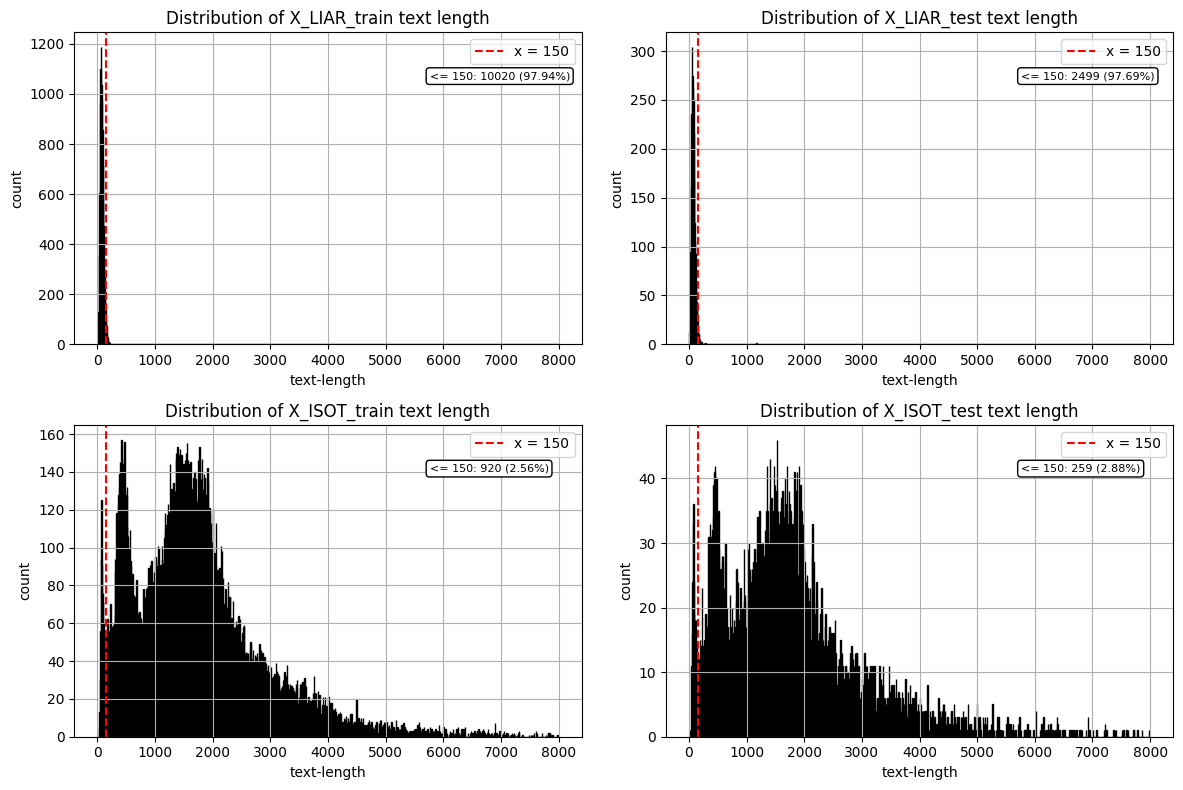

In [43]:
def plot_text_length_distribution(ax, data, title):
    x_range = (0, 8000)

    n, bins, patches = ax.hist(data['text_length'], bins=1000, range=(0, 8000), edgecolor='black')
    ax.set_xlabel('text-length')
    ax.set_ylabel('count')
    ax.set_title(f'Distribution of {title} text length')
    ax.grid(True)
    x_ticks = np.arange(x_range[0], x_range[1] + 1, 1000)
    ax.set_xticks(x_ticks)
    ax.axvline(x=150, color='red', linestyle='--', label='x = 150')
    ax.legend()

    count_smaller_or_equal_150 = np.count_nonzero(data['text_length'] <= 150)
    total_values = np.count_nonzero(data['text_length'])

    percentage = count_smaller_or_equal_150 / total_values * 100

    info_text = f"<= 150: {count_smaller_or_equal_150} ({percentage:.2f}%)"
    ax.annotate(info_text, xy=(0.7, 0.85), xycoords='axes fraction', fontsize=8,
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

datasets = [
    (X_LIAR_train, 'X_LIAR_train'),
    (X_LIAR_test, 'X_LIAR_test'),
    (X_ISOT_train, 'X_ISOT_train'),
    (X_ISOT_test, 'X_ISOT_test')
]

for ax, (data, title) in zip(axs, datasets):
    plot_text_length_distribution(ax, data, title)

plt.tight_layout()
plt.show()

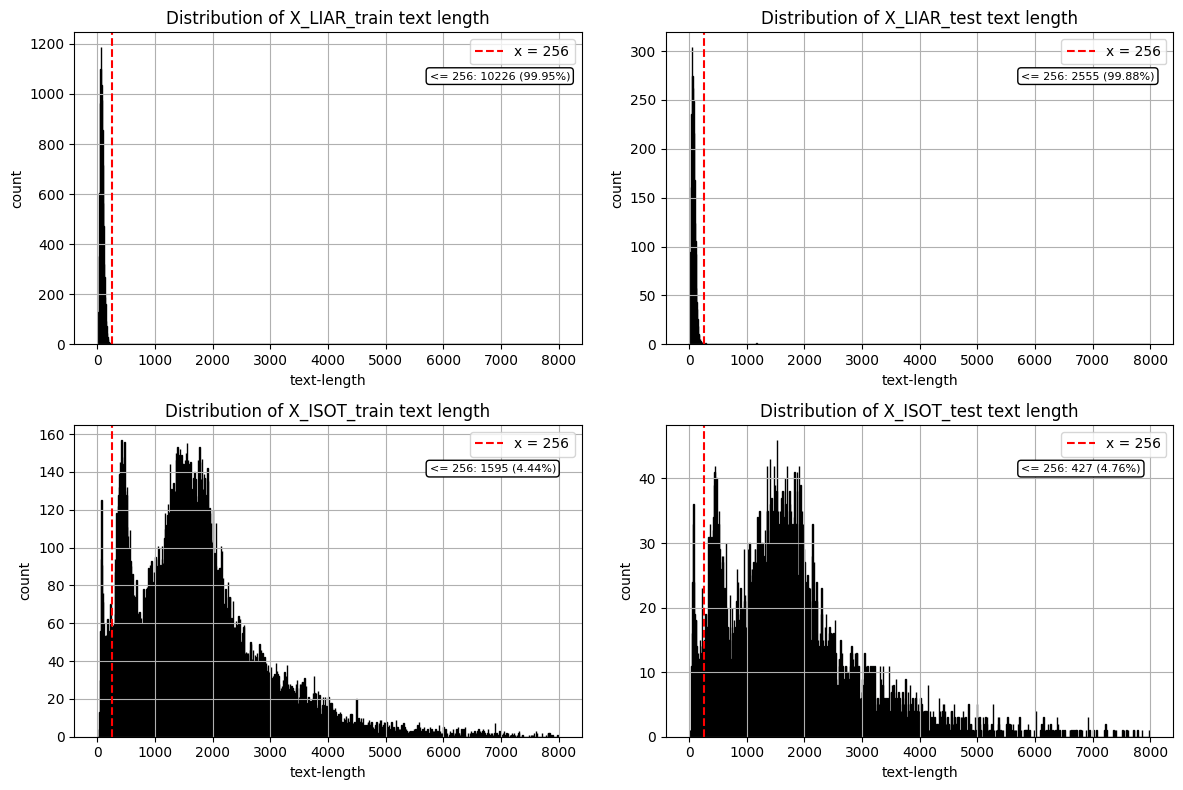

In [44]:
def plot_text_length_distribution(ax, data, title):
    x_range = (0, 8000)

    n, bins, patches = ax.hist(data['text_length'], bins=1000, range=(0, 8000), edgecolor='black')
    ax.set_xlabel('text-length')
    ax.set_ylabel('count')
    ax.set_title(f'Distribution of {title} text length')
    ax.grid(True)
    x_ticks = np.arange(x_range[0], x_range[1] + 1, 1000)
    ax.set_xticks(x_ticks)
    ax.axvline(x=256, color='red', linestyle='--', label='x = 256')
    ax.legend()

    count_smaller_or_equal_256 = np.count_nonzero(data['text_length'] <= 256)
    total_values = np.count_nonzero(data['text_length'])

    percentage = count_smaller_or_equal_256 / total_values * 100

    info_text = f"<= 256: {count_smaller_or_equal_256} ({percentage:.2f}%)"
    ax.annotate(info_text, xy=(0.7, 0.85), xycoords='axes fraction', fontsize=8,
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

datasets = [
    (X_LIAR_train, 'X_LIAR_train'),
    (X_LIAR_test, 'X_LIAR_test'),
    (X_ISOT_train, 'X_ISOT_train'),
    (X_ISOT_test, 'X_ISOT_test')
]

for ax, (data, title) in zip(axs, datasets):
    plot_text_length_distribution(ax, data, title)

plt.tight_layout()
plt.show()

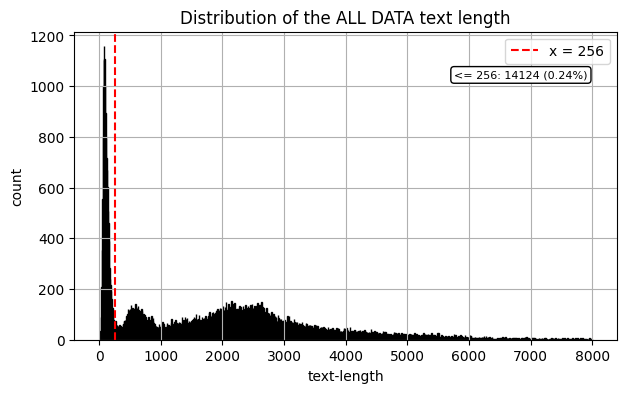

In [45]:
x_range = (0, 8000)
fig = plt.figure(figsize=(7, 4))

plt.hist(temp_comb['text_length'] , bins=1000, range=(0, 8000), edgecolor='black')
plt.xlabel('text-length')
plt.ylabel('count')
plt.title('Distribution of the ALL DATA text length')
plt.grid(True)
x_ticks = np.arange(x_range[0], x_range[1] + 1, 1000)
plt.xticks(x_ticks)
plt.axvline(x=256, color='red', linestyle='--', label='x = 256')
plt.legend()

count_smaller_or_equal_256 = np.count_nonzero(temp_comb['text_length'] <= 256)

plt.annotate(f"<= 256: {count_smaller_or_equal_256} ({count_smaller_or_equal_256/len(temp_comb):.2f}%)",
             xy=(0.7, 0.85), xycoords='axes fraction', fontsize=8,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.show()

##### Sentences' length + Fake and True distribution

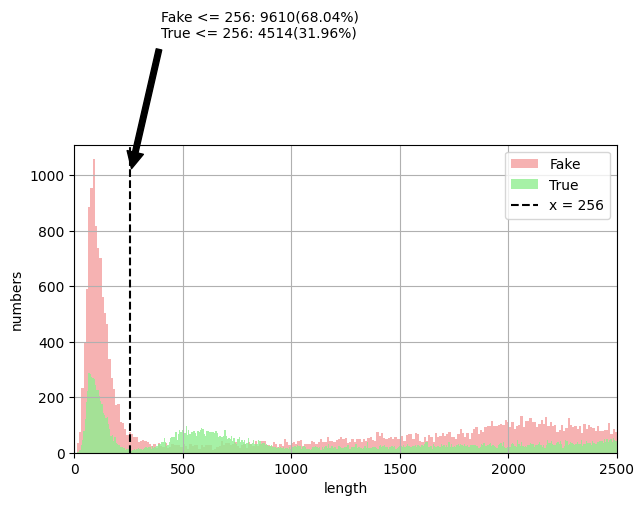

In [46]:
def plot_text_len_dist(df):
    plt.rcParams['figure.figsize'] = (7, 4)
    bins = 5000
    plt.hist(df[df['label'] == 0]['text_length'], alpha=0.6, bins=bins, color='lightcoral', label='Fake')
    plt.hist(df[df['label'] == 1]['text_length'], alpha=0.8, bins=bins, color='lightgreen', label='True')
    plt.axvline(x=256, color='black', linestyle='--', label='x = 256')

    true_count_under_256 = df.loc[(df['label'] == 1) & (df['text_length'] <= 256)].shape[0]
    fake_count_under_256 = df.loc[(df['label'] == 0) & (df['text_length'] <= 256)].shape[0]
    total = true_count_under_256 + fake_count_under_256
    plt.annotate(f'Fake <= 256: {fake_count_under_256}({fake_count_under_256/total*100:.2f}%)\nTrue <= 256: {true_count_under_256}({true_count_under_256/total*100:.2f}%)',
                 xy=(256, 1000), xytext=(400, 1500),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=10, color='black')

    plt.xlabel('length')
    plt.ylabel('numbers')
    plt.legend(loc='upper right')
    plt.xlim(0, 2500)
    plt.grid()
    plt.show()

plot_text_len_dist(temp_comb)

##### The fake will be more dominant practically...